**Import library need by the project**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #To check the required max depth


**Read data from CSV file and display the summary**

In [5]:
houses = pd.read_csv('./data/house_data.csv', sep=',')

houses.head(10)

,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET
0,Condo/Co-op,Plan 6 Plan,Sunnyvale,94089,1804990,3,3.5,Sunnyvale,1844.0
1,Condo/Co-op,188 W Saint James St #11004,San Jose,95110,890000,2,2.0,SAN JOSE,1135.0
2,Other,746 Tunitas Creek Rd,Half Moon Bay,94019,3436400,3,2.0,HALF MOON BAY,1608.0
3,Single Family Residential,3886 Ross Rd,Palo Alto,94303,6188000,5,5.5,PALO ALTO,3669.0
4,Multi-Family (5+ Unit),160 N Claremont St,San Mateo,94401,1900000,9,5.0,SAN MATEO,4145.0
5,Condo/Co-op,200 Brannan St #407,San Francisco,94107,1349000,2,2.0,SF District 9,1525.0
6,Condo/Co-op,38228 Paseo Padre Pkwy #24,Fremont,94536,599000,2,2.0,FREMONT,933.0
7,Townhouse,92 Ryland Park Way,San Jose,95110,1128000,3,2.5,CENTRAL SAN JOSE,1512.0
8,Condo/Co-op,520 Chestnut St #301,San Francisco,94133,859000,1,1.0,SF District 8,868.0
9,Condo/Co-op,2040 Franklin St #1209,San Francisco,94109,1395000,2,2.0,SF District 7,1177.0


In [6]:
houses.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET
count,1378.000000,1.378000e+03,1378.000000,1378.000000,1373.000000
mean,94527.742380,1.629686e+06,3.079826,2.429608,1751.128186
std,437.902294,1.786266e+06,2.170178,1.736902,1330.432046
min,94010.000000,3.000000e+03,0.000000,1.000000,255.000000
25%,94108.000000,7.712500e+05,2.000000,2.000000,1077.000000
50%,94403.000000,1.289440e+06,3.000000,2.000000,1451.000000
75%,95051.000000,1.835500e+06,4.000000,3.000000,1972.000000
max,95148.000000,2.988000e+07,46.000000,46.000000,29358.000000


**The dataset provides multiple columns, we need to evaluate data type to help us to make decision what we are interested in**

In [7]:
obj = (houses.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (houses.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (houses.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 3
Float variables: 2


**Heatmap to help us to understand correlation. From here, we can understand price is probably related to square feet**

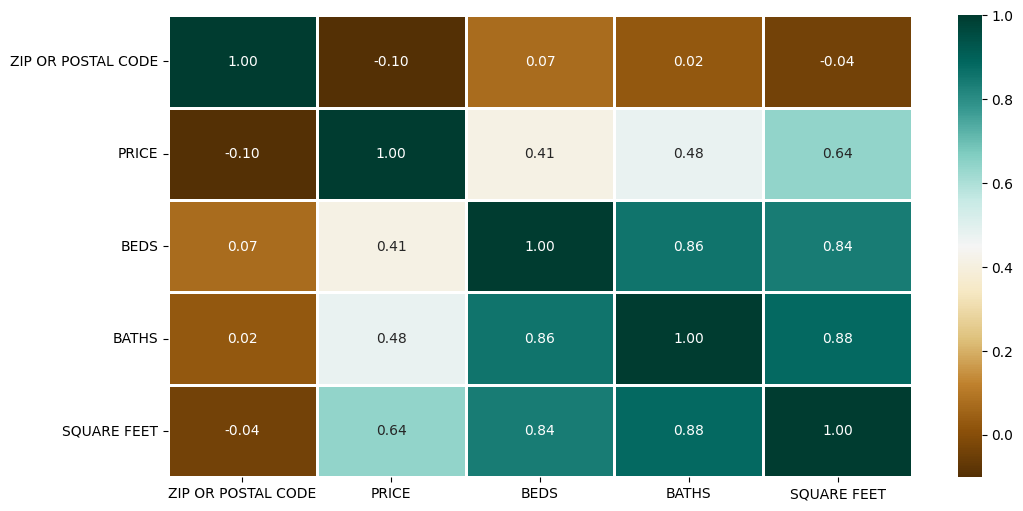

In [8]:
houses_numerical_dataset = houses.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(houses_numerical_dataset.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)
plt.show()

**We create bar charts to analyze categorical variables. Dataset has four categorical variables but it seems like property type and city are useful.**

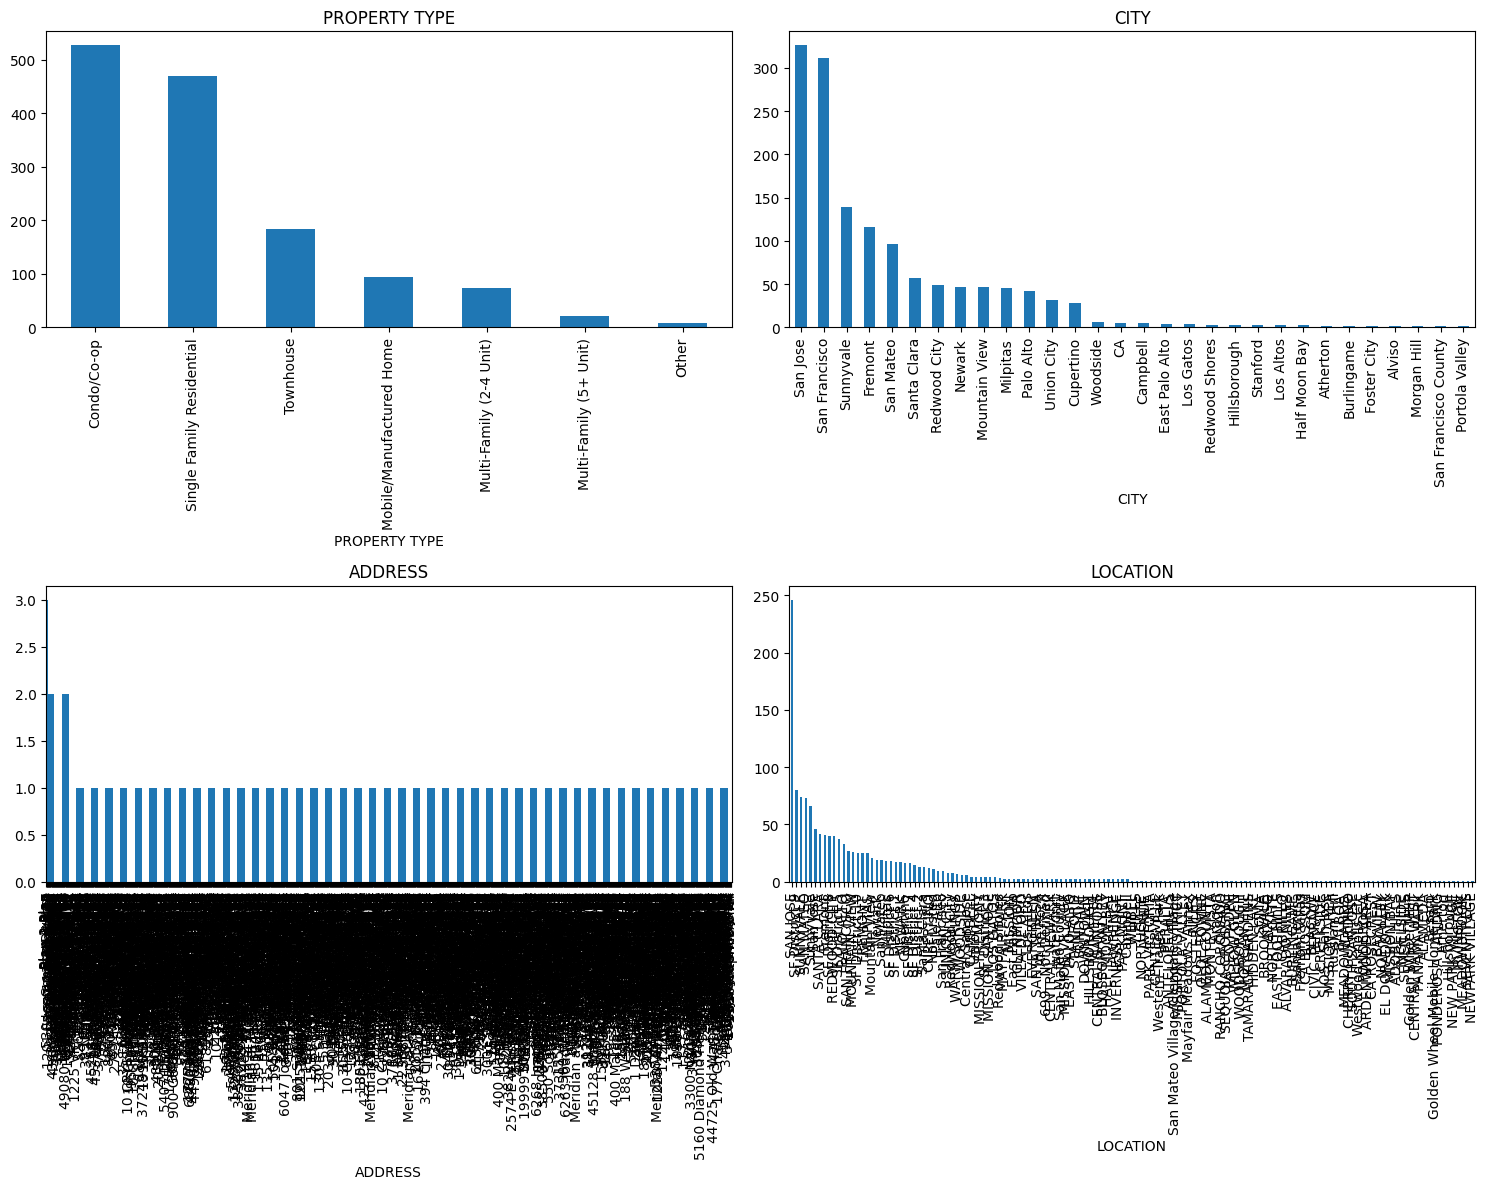

In [9]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 12))

houses['PROPERTY TYPE'].value_counts().plot(ax = ax1, kind='bar', title = 'PROPERTY TYPE') 
houses['CITY'].value_counts().plot(ax = ax2, kind='bar', title = 'CITY') 
houses['ADDRESS'].value_counts().plot(ax = ax3, kind='bar', title = 'ADDRESS') 
houses['LOCATION'].value_counts().plot(ax = ax4, kind='bar', title = 'LOCATION') 

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**According to the above bar charts, we group price by city and property type to get mean**

In [10]:
price_by_city = houses.groupby('CITY')['PRICE'].mean().astype('int64')
print(price_by_city)

print("\n\n")

price_by_property_type = houses.groupby('PROPERTY TYPE')['PRICE'].mean().astype('int64')
print(price_by_property_type)

print("\n\n")

CITY
Alviso                  1150000
Atherton                5580000
Burlingame              3999999
CA                       332919
Campbell                1419937
Cupertino               3503977
East Palo Alto          1144750
Foster City              849000
Fremont                 1323977
Half Moon Bay           3305700
Hillsborough            9088000
Los Altos                815000
Los Gatos               3118250
Milpitas                1896933
Morgan Hill              399000
Mountain View           1716196
Newark                  1108362
Palo Alto               5590304
Portola Valley          5988000
Redwood City            1916009
Redwood Shores          2560600
San Francisco           1594846
San Francisco County     930000
San Jose                1229783
San Mateo               1330528
Santa Clara             1144587
Stanford                1974000
Sunnyvale               1334721
Union City              1278714
Woodside                6455500
Name: PRICE, dtype: int64



PROPER

**Plot scatter to show the correlation of city and price, property type and price**

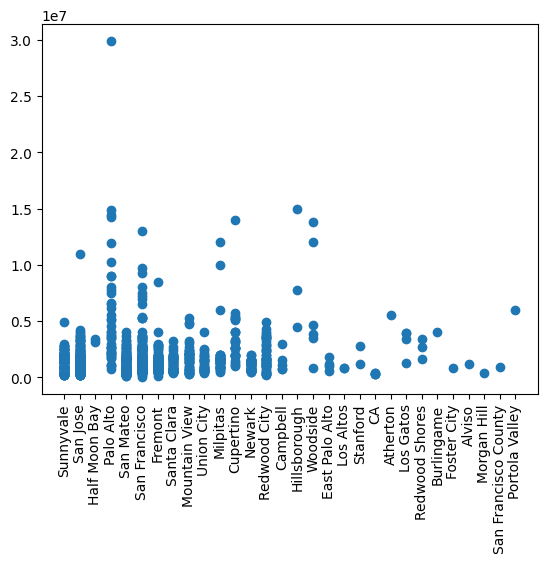

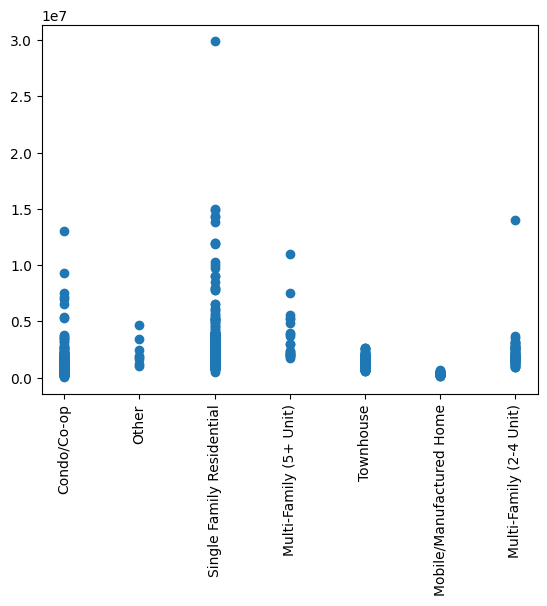

In [11]:
def plot_scatter(col_name):
    plt.scatter(houses[col_name], houses['PRICE'])
    plt.xticks(rotation=90)
    plt.show()

plot_scatter('CITY')
plot_scatter('PROPERTY TYPE')

**Check linear relationship between price and quantitative variables**

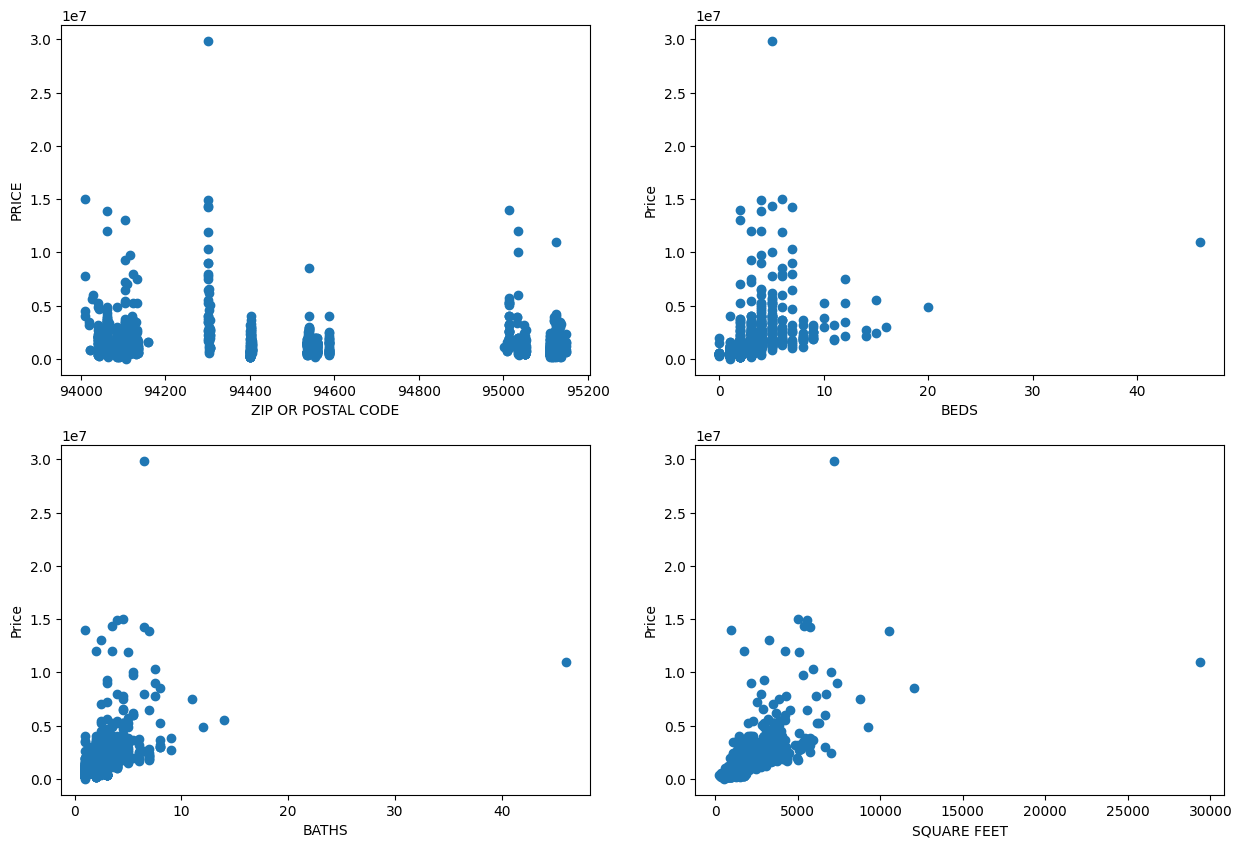

In [12]:
def plot_scatter(x, y, x_title, y_title, ax):
    ax.scatter(x, y) 
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

plot_scatter(houses['ZIP OR POSTAL CODE'], houses['PRICE'], 'ZIP OR POSTAL CODE', 'PRICE', ax1)
plot_scatter(houses['BEDS'], houses['PRICE'], 'BEDS', 'Price', ax2)
plot_scatter(houses['BATHS'], houses['PRICE'], 'BATHS', 'Price', ax3)
plot_scatter(houses['SQUARE FEET'], houses['PRICE'], 'SQUARE FEET', 'Price', ax4)

plt.show()

**Remove outlier**

In [13]:
houses = houses.drop(houses[houses['BEDS'] > 20].index)
houses = houses.drop(houses[houses['BATHS'] > 20].index)
houses = houses.drop(houses[houses['SQUARE FEET'] > 15000].index)

**After moving outlier, check relationshtp again**

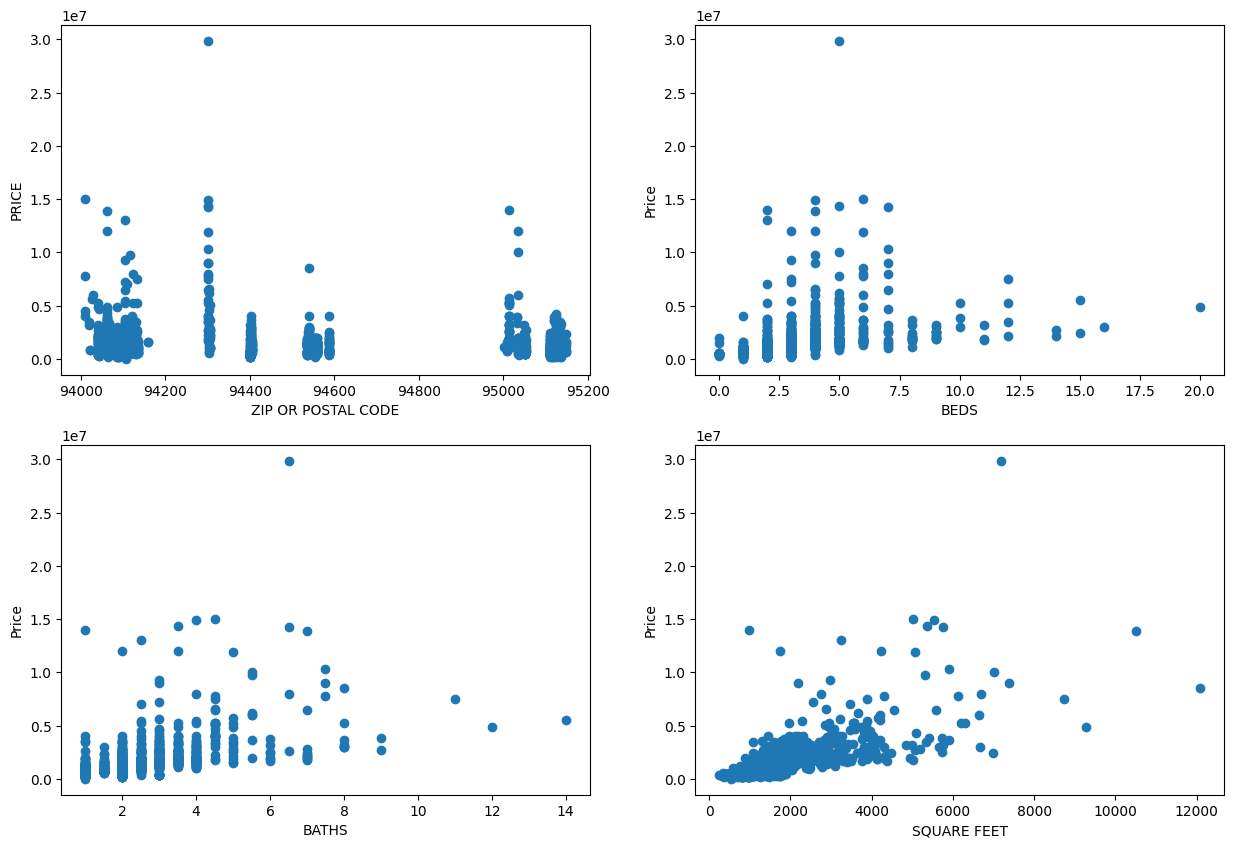

In [14]:
def plot_scatter(x, y, x_title, y_title, ax):
    ax.scatter(x, y) 
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

plot_scatter(houses['ZIP OR POSTAL CODE'], houses['PRICE'], 'ZIP OR POSTAL CODE', 'PRICE', ax1)
plot_scatter(houses['BEDS'], houses['PRICE'], 'BEDS', 'Price', ax2)
plot_scatter(houses['BATHS'], houses['PRICE'], 'BATHS', 'Price', ax3)
plot_scatter(houses['SQUARE FEET'], houses['PRICE'], 'SQUARE FEET', 'Price', ax4)

**To prove the assumption there has association between property type and price, city and price, we use Chi-square to test. The value from CHi-square is very large which indicates there has association between property type and price, city and price**

In [15]:
propery_table = pd.crosstab(houses['PROPERTY TYPE'], houses['PRICE'])

stat, p_value, dof, expected = stats.chi2_contingency(propery_table, correction = False)
print("Chi-square test for property type and price: {}".format(round(stat, 2)))
print("P-value for property type and price: {}".format(p_value))

city_table = pd.crosstab(houses['CITY'], houses['PRICE'])

stat, p_value, dof, expected = stats.chi2_contingency(city_table, correction = False)
print("Chi-square test for city and price: {}".format(round(stat, 2)))
print("P-value for city and price: {}".format(p_value))

Chi-square test for property type and price: 5374.71
P-value for property type and price: 2.1276344400631104e-20
Chi-square test for city and price: 27889.37
P-value for city and price: 2.7988804834001787e-174


**We dropped some columns because those are not useful. We also need to drop the data if column includes NaN**

In [16]:
cleanup_houses = houses.drop(columns=['LOCATION', 'ADDRESS'], errors='ignore')
cleanup_houses = cleanup_houses.dropna()
print(cleanup_houses.head(10))

               PROPERTY TYPE           CITY  ZIP OR POSTAL CODE    PRICE  \
0                Condo/Co-op      Sunnyvale               94089  1804990   
1                Condo/Co-op       San Jose               95110   890000   
2                      Other  Half Moon Bay               94019  3436400   
3  Single Family Residential      Palo Alto               94303  6188000   
4     Multi-Family (5+ Unit)      San Mateo               94401  1900000   
5                Condo/Co-op  San Francisco               94107  1349000   
6                Condo/Co-op        Fremont               94536   599000   
7                  Townhouse       San Jose               95110  1128000   
8                Condo/Co-op  San Francisco               94133   859000   
9                Condo/Co-op  San Francisco               94109  1395000   

   BEDS  BATHS  SQUARE FEET  
0     3    3.5       1844.0  
1     2    2.0       1135.0  
2     3    2.0       1608.0  
3     5    5.5       3669.0  
4     9    5.

**We need to encode catetorical variables since string cannot be built model**

In [17]:
encoder_property = LabelEncoder()
cleanup_houses['PROPERTY TYPE'] = encoder_property.fit_transform(cleanup_houses['PROPERTY TYPE'])
property_type = set(cleanup_houses['PROPERTY TYPE'])

property_encoded_label = [i for i in range(len(property_type))]

property_type_mapping = {}
properties = encoder_property.inverse_transform(property_encoded_label)
print("Property type encoding mapping")
for i in range(len(properties)):
    property_type_mapping[i] = properties[i]

print(property_type_mapping)

encoder_city = LabelEncoder()
cleanup_houses['CITY'] = encoder_city.fit_transform(cleanup_houses['CITY'])
city_type = set(cleanup_houses['CITY'])

city_encoded_label = [i for i in range(len(city_type))]

city_type_mapping = {}
cities = encoder_city.inverse_transform(city_encoded_label)
for i in range(len(cities)):
    city_type_mapping[i] = cities[i]

print(city_type_mapping)
print()
print(cleanup_houses)

Property type encoding mapping
{0: 'Condo/Co-op', 1: 'Mobile/Manufactured Home', 2: 'Multi-Family (2-4 Unit)', 3: 'Multi-Family (5+ Unit)', 4: 'Other', 5: 'Single Family Residential', 6: 'Townhouse'}
{0: 'Alviso', 1: 'Atherton', 2: 'Burlingame', 3: 'Campbell', 4: 'Cupertino', 5: 'East Palo Alto', 6: 'Foster City', 7: 'Fremont', 8: 'Half Moon Bay', 9: 'Hillsborough', 10: 'Los Altos', 11: 'Los Gatos', 12: 'Milpitas', 13: 'Morgan Hill', 14: 'Mountain View', 15: 'Newark', 16: 'Palo Alto', 17: 'Portola Valley', 18: 'Redwood City', 19: 'Redwood Shores', 20: 'San Francisco', 21: 'San Francisco County', 22: 'San Jose', 23: 'San Mateo', 24: 'Santa Clara', 25: 'Stanford', 26: 'Sunnyvale', 27: 'Union City', 28: 'Woodside'}

      PROPERTY TYPE  CITY  ZIP OR POSTAL CODE    PRICE  BEDS  BATHS  \
0                 0    26               94089  1804990     3    3.5   
1                 0    22               95110   890000     2    2.0   
2                 4     8               94019  3436400     3    

**Splitting data to Training & Test**

In [18]:
# Splitting to training set and target set
tmp_x = cleanup_houses.drop(['PRICE'], axis=1)
tmp_y = cleanup_houses['PRICE']

# Splitting the dataset into 80% training and 20% testing
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(tmp_x, tmp_y, train_size = 0.8, test_size = 0.2)

# Checking the split
print(f"Training set X size: {len(x_train_set)}")
print(f"Test set X size: {len(x_test_set)}")
print(f"Training set Y size: {len(y_train_set)}")
print(f"Test set Y size: {len(y_test_set)}")

Training set X size: 1097
Test set X size: 275
Training set Y size: 1097
Test set Y size: 275


*Build Linear Regression model**

In [19]:
model_linear = LinearRegression()
model_linear.fit(x_train_set.values, y_train_set.values)
prediction = model_linear.predict(x_test_set.values)

print("Mean error percentage of Linear Regression: {}".format(
    round(mean_absolute_percentage_error(y_test_set.values, prediction), 2)))

# PROPERTY TYPE,  CITY,  ZIP OR POSTAL CODE, BEDS,  BATHS,  SQUARE FEET
sample = np.array([5, 22, 95131, 3, 2, 1500]).reshape(1, -1)

print("Linear regression predicts the price of Single family house in San Jose: {} dollars".format(round(model_linear.predict(sample)[0])))

Mean error percentage of Linear Regression: 0.47
Linear regression predicts the price of Single family house in San Jose: 1268918 dollars


In [20]:
linear_r_square = model_linear.score(x_train_set.values, y_train_set.values)

linear_equation = str(round(model_linear.intercept_, 2))
column_names = x_train_set.columns
for i in range(len(model_linear.coef_)):
    linear_equation = linear_equation + " + "  + str(round(model_linear.coef_[i], 2)) + " * " + column_names[i]

print("Y = {}".format(linear_equation))
print("R-Square: {}".format(round(linear_r_square, 2)))

Y = 22444225.53 + 71798.59 * PROPERTY TYPE + -23220.52 * CITY + -233.78 * ZIP OR POSTAL CODE + -245829.74 * BEDS + -5551.27 * BATHS + 1309.8 * SQUARE FEET
R-Square: 0.61


**Build Support Vector Regression model**

In [21]:
model_svr = SVR(kernel='linear')
model_svr.fit(x_train_set.values, y_train_set.values)
svr_prediction = model_svr.predict(x_test_set.values)

print("Mean error percentage of Support Vector Regression: {}".format(
    round(mean_absolute_percentage_error(y_test_set.values, svr_prediction), 2)))

print("SVR predicts the price of Single family house in San Jose: {} dollars".format(round(model_linear.predict(sample)[0])))

Mean error percentage of Support Vector Regression: 0.42
SVR predicts the price of Single family house in San Jose: 1268918 dollars


In [22]:
svr_r_square = model_svr.score(x_train_set.values, y_train_set.values)

svr_equation = str(round(model_svr.intercept_[0], 2))
column_names = x_train_set.columns
for i in range(len(model_svr.coef_[0])):
    svr_equation = svr_equation + " + "  + str(round(model_svr.coef_[0][i], 2)) + " * " + column_names[i]

print("Y = {}".format(svr_equation))
print("R-Square: {}".format(round(svr_r_square, 2)))

Y = 16317313.38 + 676.74 * PROPERTY TYPE + -505.24 * CITY + -172.99 * ZIP OR POSTAL CODE + -81.56 * BEDS + -11.89 * BATHS + 883.3 * SQUARE FEET
R-Square: 0.54


In [37]:
#Finding the required Max depth for this case
# Define a range of max_depth values to try
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20]}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=0)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_set.values, y_train_set.values)

print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best cross-validation R^2 score:", grid_search.best_score_)

Best max_depth: 20
Best cross-validation R^2 score: 0.6809516289683325


In [38]:
#Random Forest
rf_model = RandomForestRegressor(max_depth=20, random_state=0)
rf_model.fit(x_train_set.values, y_train_set.values)
prediction = rf_model.predict(x_test_set.values)
#using the same sample
sample
#print(rf_model.predict([[0, 0, 0, 0]]))
rf_predict=rf_model.predict(sample)[0]
print(f'Predicted price from Random Forest for our sample: ${rf_predict:.2f}')


Predicted price from Random Forest for our sample: $1743131.88
